In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
emp_features_dataset = pd.read_csv('daily-happiness-employee-turnover/emp_features.csv')
emp_comp_features_dataset = pd.read_csv('daily-happiness-employee-turnover/emp_com_features.csv')

In [3]:
emp_features_dataset.head()

,employee,total_liked,total_disliked,total_comments,avg_comment_len,likes_received,dislikes_received,companyAlias,numVotes,stillExists,days_since_last_activity,avg_vote,likeability,dislikeability,social_index
0,0_-2,3,0,0.0,0.0,0.0,0.0,0,0,0,61,0.0,0.00,0.00,0.6
1,0_-4,4,2,22.0,54.0,116.0,46.0,0,0,0,133,0.0,0.72,0.28,7.8
2,0_-6,2,0,0.0,0.0,0.0,0.0,0,0,0,146,0.0,0.00,0.00,0.4
3,0_10,29,6,6.0,86.0,16.0,20.0,0,56,1,10,3.0,0.44,0.56,36.8
4,0_100,288,2,60.0,64.0,326.0,50.0,0,187,1,0,4.0,0.87,0.13,169.5


In [4]:
emp_features_dataset.columns

Index([u'employee', u'total_liked', u'total_disliked', u'total_comments',
       u'avg_comment_len', u'likes_received', u'dislikes_received',
       u'companyAlias', u'numVotes', u'stillExists',
       u'days_since_last_activity', u'avg_vote', u'likeability',
       u'dislikeability', u'social_index'],
      dtype='object')

In [5]:
emp_features_dataset['stillExists'].value_counts()

1    2941
0     608
Name: stillExists, dtype: int64

In [7]:
import matplotlib as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<module 'matplotlib' from '/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.pyc'>

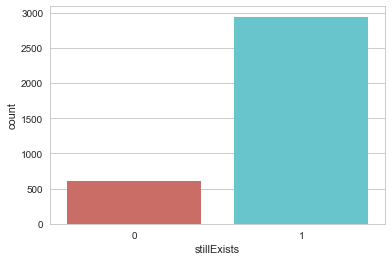

In [10]:
sns.countplot(x='stillExists', data=emp_features_dataset, palette='hls')
plt

In [15]:

y = emp_features_dataset.stillExists


In [17]:
X = emp_features_dataset.drop(['employee', 'stillExists','companyAlias'], axis=1)

In [19]:
X.head()

,total_liked,total_disliked,total_comments,avg_comment_len,likes_received,dislikes_received,numVotes,days_since_last_activity,avg_vote,likeability,dislikeability,social_index
0,3,0,0.0,0.0,0.0,0.0,0,61,0.0,0.00,0.00,0.6
1,4,2,22.0,54.0,116.0,46.0,0,133,0.0,0.72,0.28,7.8
2,2,0,0.0,0.0,0.0,0.0,0,146,0.0,0.00,0.00,0.4
3,29,6,6.0,86.0,16.0,20.0,56,10,3.0,0.44,0.56,36.8
4,288,2,60.0,64.0,326.0,50.0,187,0,4.0,0.87,0.13,169.5


In [29]:
normalized_df=(X-X.min())/(X.max()-X.min())

In [31]:
normalized_df.head()

,total_liked,total_disliked,total_comments,avg_comment_len,likes_received,dislikes_received,numVotes,days_since_last_activity,avg_vote,likeability,dislikeability,social_index
0,0.000952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080902,0.00,0.00,0.00,0.000325
1,0.001269,0.002245,0.032934,0.061364,0.017688,0.023711,0.000000,0.176393,0.00,0.72,0.28,0.006168
2,0.000635,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.193634,0.00,0.00,0.00,0.000162
3,0.009203,0.006734,0.008982,0.097727,0.002440,0.010309,0.075676,0.013263,0.75,0.44,0.56,0.029705
4,0.091400,0.002245,0.089820,0.072727,0.049710,0.025773,0.252703,0.000000,1.00,0.87,0.13,0.137408


In [34]:
#from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(normalized_df,y,test_size=0.25,random_state=0)

In [35]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 95,  63],
       [  6, 724]])

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

('Accuracy:', 0.9222972972972973)
('Precision:', 0.9199491740787802)
('Recall:', 0.9917808219178083)


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

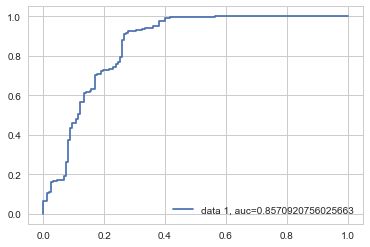

In [41]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [43]:
## Employee features
auc

0.8570920756025663

#### Employee company features

In [44]:
emp_comp_features_dataset.head()

,employee,total_liked,total_disliked,total_comments,avg_comment_len,likes_received,dislikes_received,companyAlias,numVotes,stillExists,...,dislikeability,social_index,num_emp,com_total_comments,com_avg_comment_len,com_total_likes,com_total_dislikes,com_total_votes,com_avg_vote,relative_happiness
0,0_-2,3,0,0.0,0.0,0.0,0.0,0,0,0,...,0.00,0.6,303,10088.0,65.8,66454.0,17024.0,26384,3.0,0.00
1,0_-4,4,2,22.0,54.0,116.0,46.0,0,0,0,...,0.28,7.8,303,10088.0,65.8,66454.0,17024.0,26384,3.0,0.00
2,0_-6,2,0,0.0,0.0,0.0,0.0,0,0,0,...,0.00,0.4,303,10088.0,65.8,66454.0,17024.0,26384,3.0,0.00
3,0_10,29,6,6.0,86.0,16.0,20.0,0,56,1,...,0.56,36.8,303,10088.0,65.8,66454.0,17024.0,26384,3.0,1.00
4,0_100,288,2,60.0,64.0,326.0,50.0,0,187,1,...,0.13,169.5,303,10088.0,65.8,66454.0,17024.0,26384,3.0,1.33


In [45]:
emp_comp_features_dataset.columns

Index([u'employee', u'total_liked', u'total_disliked', u'total_comments',
       u'avg_comment_len', u'likes_received', u'dislikes_received',
       u'companyAlias', u'numVotes', u'stillExists',
       u'days_since_last_activity', u'avg_vote', u'likeability',
       u'dislikeability', u'social_index', u'num_emp', u'com_total_comments',
       u'com_avg_comment_len', u'com_total_likes', u'com_total_dislikes',
       u'com_total_votes', u'com_avg_vote', u'relative_happiness'],
      dtype='object')

In [46]:
y = emp_comp_features_dataset['stillExists']

In [47]:
X = emp_comp_features_dataset.drop(['employee', 'stillExists','companyAlias'], axis=1)

In [48]:
X.head()

,total_liked,total_disliked,total_comments,avg_comment_len,likes_received,dislikes_received,numVotes,days_since_last_activity,avg_vote,likeability,dislikeability,social_index,num_emp,com_total_comments,com_avg_comment_len,com_total_likes,com_total_dislikes,com_total_votes,com_avg_vote,relative_happiness
0,3,0,0.0,0.0,0.0,0.0,0,61,0.0,0.00,0.00,0.6,303,10088.0,65.8,66454.0,17024.0,26384,3.0,0.00
1,4,2,22.0,54.0,116.0,46.0,0,133,0.0,0.72,0.28,7.8,303,10088.0,65.8,66454.0,17024.0,26384,3.0,0.00
2,2,0,0.0,0.0,0.0,0.0,0,146,0.0,0.00,0.00,0.4,303,10088.0,65.8,66454.0,17024.0,26384,3.0,0.00
3,29,6,6.0,86.0,16.0,20.0,56,10,3.0,0.44,0.56,36.8,303,10088.0,65.8,66454.0,17024.0,26384,3.0,1.00
4,288,2,60.0,64.0,326.0,50.0,187,0,4.0,0.87,0.13,169.5,303,10088.0,65.8,66454.0,17024.0,26384,3.0,1.33


In [49]:
normalized_df = (X-X.min())/(X.max()-X.min())

In [ ]:
normalized_df